In [45]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
stock = 'GOOG'
data = yf.download(stock,'2010-01-01','2023-05-19')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,15.615220,15.678981,15.547723,15.610239,15.610239,78541293
2010-01-05,15.620949,15.637387,15.480475,15.541497,15.541497,120638494
2010-01-06,15.588072,15.588072,15.102393,15.149715,15.149715,159744526
2010-01-07,15.178109,15.193053,14.760922,14.797037,14.797037,257533695
2010-01-08,14.744733,15.024933,14.672753,14.994298,14.994298,189680313


In [47]:
price = data['Close']
price

Date
2010-01-04     15.610239
2010-01-05     15.541497
2010-01-06     15.149715
2010-01-07     14.797037
2010-01-08     14.994298
                 ...    
2023-05-12    117.919998
2023-05-15    116.959999
2023-05-16    120.089996
2023-05-17    121.480003
2023-05-18    123.519997
Name: Close, Length: 3367, dtype: float64

<Axes: xlabel='Date'>

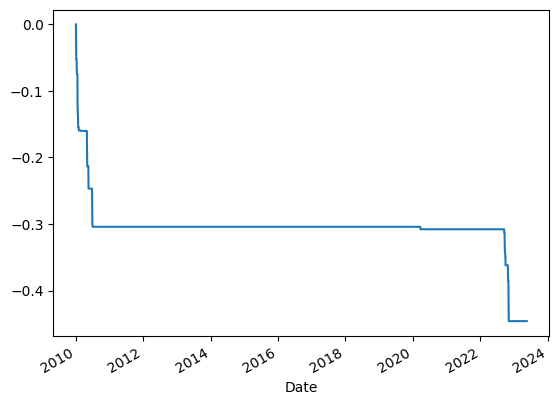

In [48]:
#Maximum Drawdown (MDD) calculation
roll_max = data['Close'].rolling(len(price)-1,min_periods=1).max()
daily_drawdown = data['Close']/roll_max - 1.0
mdd = daily_drawdown.rolling(len(price)-1,min_periods=1).min()
mdd.plot()

In [49]:
print(f"Maximum Drawdown for the given period is: {mdd[-1]*100} %")

Maximum Drawdown for the given period is: -44.60184987847865 %


In [50]:
#Cumulative returns
returns = data['Close'].resample('D').ffill().pct_change().to_numpy()
returns[0] = 0
returns

array([ 0.        , -0.00440364, -0.02520876, ...,  0.02676126,
        0.01157471,  0.01679283])

In [51]:
cumulative_ret =( 1+returns).cumprod()
cumulative_ret

array([1.        , 0.99559636, 0.97049862, ..., 7.69302739, 7.78207195,
       7.91275498])

In [52]:
print(f"Cumulative return of stock is {cumulative_ret[-1]*100}%")

Cumulative return of stock is 791.275498178759%


In [53]:
# Sharpe ratio
yearly_returns = data['Close'].resample('Y').ffill().pct_change()
yearly_returns

Date
2010-12-31         NaN
2011-12-31    0.087429
2012-12-31    0.095185
2013-12-31    0.584311
2014-12-31   -0.059656
2015-12-31    0.445599
2016-12-31    0.017051
2017-12-31    0.355757
2018-12-31   -0.010312
2019-12-31    0.291046
2020-12-31    0.310287
2021-12-31    0.651706
2022-12-31   -0.386713
2023-12-31    0.392088
Freq: A-DEC, Name: Close, dtype: float64

In [54]:
monthly_returns = data['Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2010-01-31         NaN
2010-02-28   -0.005925
2010-03-31    0.076538
2010-04-30   -0.073036
2010-05-31   -0.076222
                ...   
2023-01-31    0.125549
2023-02-28   -0.095825
2023-03-31    0.151716
2023-04-30    0.040577
2023-05-31    0.141379
Freq: M, Name: Close, Length: 161, dtype: float64

In [55]:
avg_yearly_return = yearly_returns.mean()
print(f"Average yearly return is : {avg_yearly_return*100}%")

Average yearly return is : 21.336752990093085%


In [56]:
sharpe_ratio = (avg_yearly_return - 0.05)/(monthly_returns.std())
print(f"Sharpe ratio is : {sharpe_ratio*10}")

Sharpe ratio is : 22.693375320278232


In [57]:
# Sortino ratio
neg_monthly_returns = monthly_returns[monthly_returns < 0]
neg_monthly_returns

Date
2010-02-28   -0.005925
2010-04-30   -0.073036
2010-05-31   -0.076222
2010-06-30   -0.083768
2010-08-31   -0.071837
                ...   
2022-08-31   -0.064215
2022-09-30   -0.119102
2022-10-31   -0.015497
2022-12-31   -0.125382
2023-02-28   -0.095825
Name: Close, Length: 64, dtype: float64

In [58]:
std_neg = neg_monthly_returns.std()
sortino = ((avg_yearly_return - 0.05)*10.0)/std_neg
print(f"Sortino Ratio: {sortino}")

Sortino Ratio: 43.155750356492476
